# Data Preparation

Check if GPU is available:

In [1]:
import torch
torch.cuda.is_available()

True

## Import of Libraries and Initial Data Set

In [2]:
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from tqdm import tqdm
import math

import logging.config
logging.config.dictConfig({'version': 1, 'disable_existing_loggers': True})

Load the Coinmetrics datasets and save a single dataset containing all CSV-files of all Cryptocurrencies:

In [3]:
# Set the path to the "csv" subfolder within the "data-master" folder
path = '/home/lmilo_ext/Data/data-master/csv'
# Change the current working directory to the "csv" subfolder
os.chdir(path)
files = os.listdir()

In [4]:
# Get a list of the CSV files in the directory
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
csv_files = sorted(csv_files)

# Create an empty list to hold the individual DataFrames
dfs = []

# Loop through the CSV files, reading each one into a DataFrame and appending it to the list
for file in tqdm(csv_files):
    file_path = os.path.join(path, file)
    data = pd.read_csv(file_path)
    data.insert(0, 'identifier', file.split('.')[0])
    dfs.append(data)

# Concatenate all of the individual DataFrames into a single large DataFrame
df_large = pd.concat(dfs)

# Write the final DataFrame to a CSV file and save it
output_path = '/home/lmilo_ext/Data/data-master/large_dataframe.csv'
df_large.to_csv(output_path, index=False)

 15%|█▌        | 104/686 [00:00<00:03, 151.43it/s]/tmp/ipykernel_1914092/734957340.py:11: DtypeWarning: Columns (146) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
100%|██████████| 686/686 [00:05<00:00, 116.13it/s]


In [5]:
df_large.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808968 entries, 0 to 2101
Columns: 155 entries, identifier to GasUsedTxMean
dtypes: float64(152), object(3)
memory usage: 962.8+ MB


In [6]:
df_large.head(808968)

,identifier,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in100MCnt,AdrBal1in10BCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1BCnt,AdrBal1in1KCnt,...,SplyMiner0HopAllNtv,SplyMiner0HopAllUSD,SplyMiner1HopAllNtv,SplyMiner1HopAllUSD,GasLmtBlk,GasLmtBlkMean,GasLmtTx,GasLmtTxMean,GasUsedTx,GasUsedTxMean
0,1inch,2020-12-23,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1inch,2020-12-24,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1inch,2020-12-25,33995.0,257.0,10078.0,11646.0,41.0,8455.0,10962.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1inch,2020-12-26,12305.0,184.0,10324.0,13015.0,34.0,8155.0,11927.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1inch,2020-12-27,6016.0,182.0,10284.0,13158.0,39.0,8009.0,11953.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,zrx,2023-05-09,163.0,2614.0,101879.0,156416.0,396.0,61025.0,128557.0,179.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2098,zrx,2023-05-10,148.0,2612.0,101885.0,156421.0,398.0,61026.0,128563.0,179.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2099,zrx,2023-05-11,114.0,2610.0,101898.0,156436.0,395.0,61033.0,128577.0,178.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2100,zrx,2023-05-12,123.0,2611.0,101910.0,156448.0,398.0,61046.0,128589.0,178.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Initial Data Cleaning

Check for all NaN-values in the initial data set, **df_large**:

In [7]:
num_values = df_large.size

print("Total number of values:", num_values)

num_nans = df_large.isna().sum().sum()

print("Number of NaN values in the DataFrame:", num_nans)
print("Number of actual not NaN values:", num_values - num_nans)

Total number of values: 125390040
Number of NaN values in the DataFrame: 99639971
Number of actual not NaN values: 25750069


Check number of NaN values per column, to have an overview which columns contain the most data

In [8]:
num_nans = df_large.isna().sum()
print("Number of NaN values per column:")
print(num_nans)

Number of NaN values per column:
identifier               0
time                     0
AdrActCnt           615281
AdrBal1in100KCnt    625222
AdrBal1in100MCnt    625222
                     ...  
GasLmtBlkMean       803636
GasLmtTx            803636
GasLmtTxMean        803644
GasUsedTx           803636
GasUsedTxMean       803644
Length: 155, dtype: int64


Correlation matrix which shows highly correlated columns/features in the initial dataframe, **df_large**:

/tmp/ipykernel_1914092/3211758032.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_large.corr()


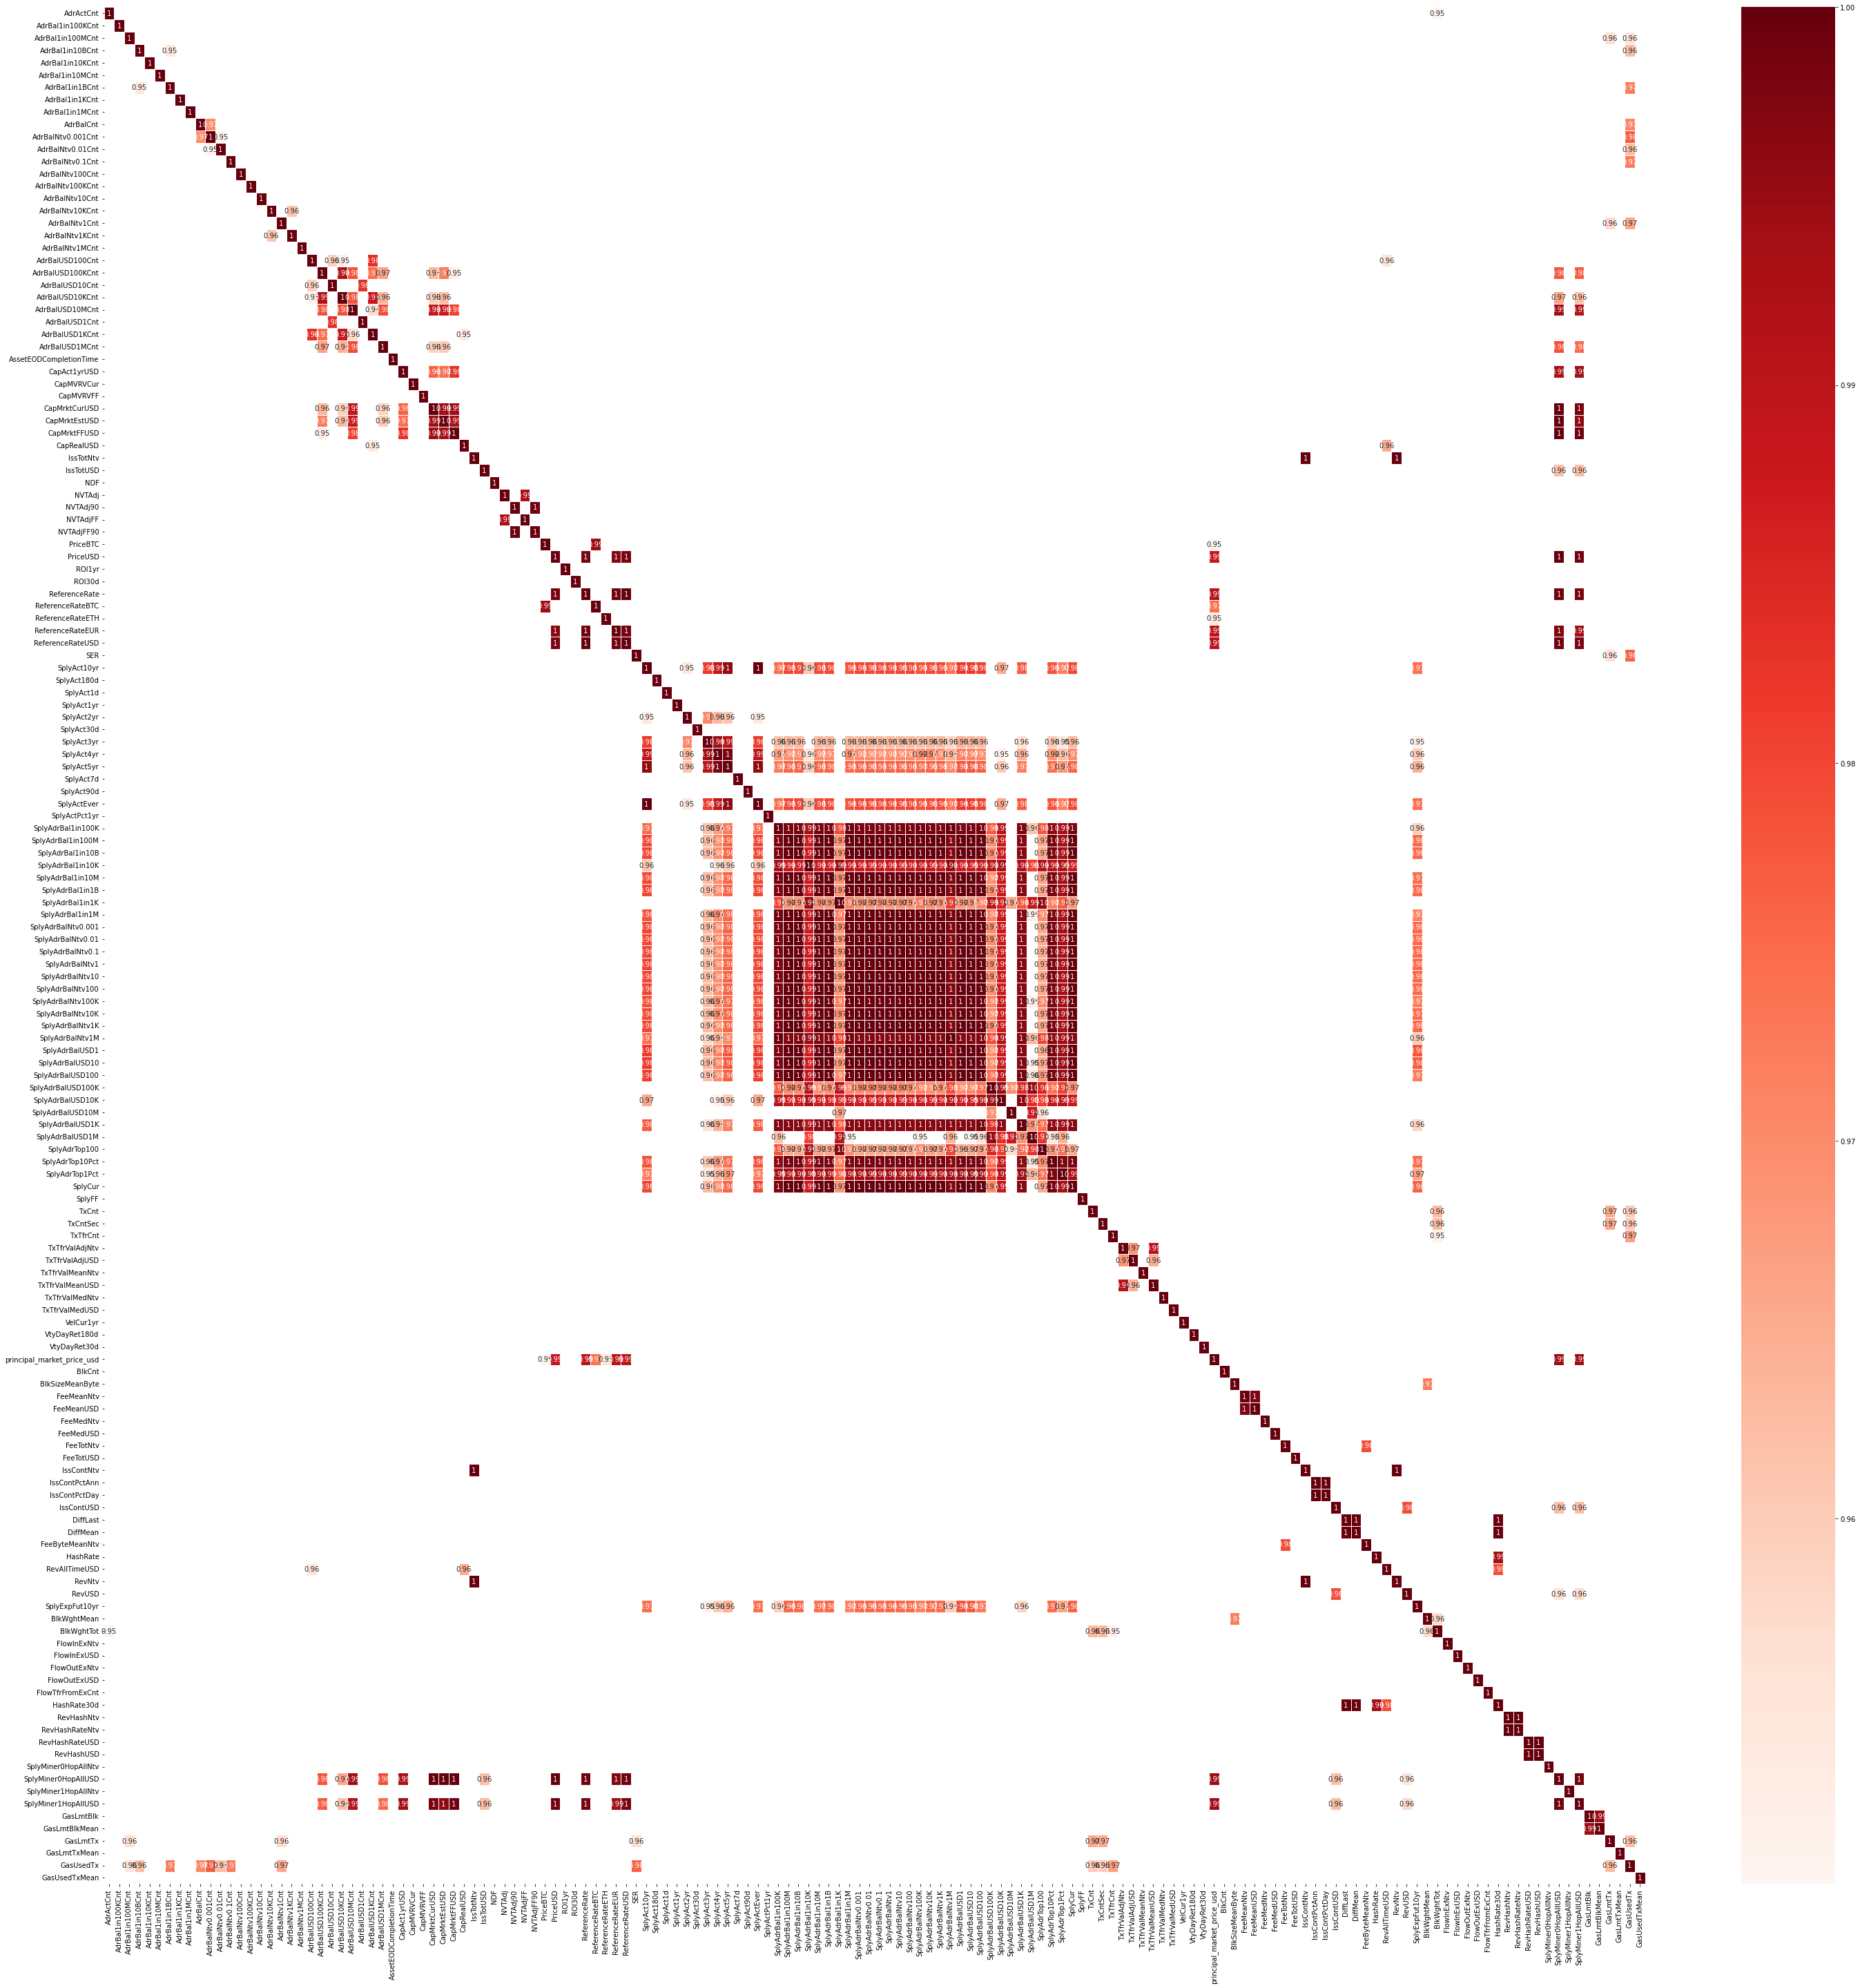

In [9]:
correlation_matrix = df_large.corr()

# Set the correlation threshold that has been found as an appropriate degree for highly correlated columns
threshold = 0.95

# Find the columns that have a positive correlation above the defined threshold (not interested in dropping negative correlated columns)
strong_correlations = correlation_matrix >= threshold

# Filter the correlation matrix to include only the strongly correlated columns
strong_correlation_matrix = correlation_matrix[strong_correlations]

# Create a heatmap of the strongly correlated columns
plt.figure(figsize=(50, 50))
sns.heatmap(strong_correlation_matrix, annot=True, cmap='Reds', linewidths=0.5)
plt.show()

Dropping all columns that have been identified in the previous step as highly correlated with each other, in order to eliminate redundancy in the dataframe. Thereby, for each of these highly correlated groups, the column with the most non-NaN values has been keptin the dataframe and the others (containing more NaN-values) have been dropped. <br> -> Creation of dataframe **df_droppedcor**:

In [10]:
redundant_columns = {}  # Dictionary to track redundant columns

# Iterate over columns in the correlation matrix
for col in strong_correlations.columns:
    correlated_cols = strong_correlations[col][strong_correlations[col]].index.tolist()  # Get correlated columns
    if len(correlated_cols) > 1:  # If there are more than 1 correlated columns
        non_null_counts = df_large[correlated_cols].count()  # Count non-null values in each column
        column_to_keep = non_null_counts.idxmax()  # Find column with the most non-null values
        redundant_cols = [col for col in correlated_cols if col != column_to_keep]  # Identify redundant columns
        redundant_columns[column_to_keep] = redundant_cols  # Store redundant columns in the dictionary

redundant_cols = [col for cols in redundant_columns.values() for col in cols]  # Get all redundant column names

df_droppedcor = df_large.drop(columns=redundant_cols)  # Drop redundant columns from the initial dataframe

In [11]:
df_droppedcor.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808968 entries, 0 to 2101
Data columns (total 66 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   identifier              808968 non-null  object 
 1   time                    808968 non-null  object 
 2   AdrActCnt               193687 non-null  float64
 3   AdrBal1in100KCnt        183746 non-null  float64
 4   AdrBal1in10KCnt         183746 non-null  float64
 5   AdrBal1in10MCnt         183745 non-null  float64
 6   AdrBal1in1KCnt          183745 non-null  float64
 7   AdrBal1in1MCnt          183746 non-null  float64
 8   AdrBalNtv100Cnt         183745 non-null  float64
 9   AdrBalNtv100KCnt        183746 non-null  float64
 10  AdrBalNtv10Cnt          183746 non-null  float64
 11  AdrBalNtv10KCnt         183746 non-null  float64
 12  AdrBalNtv1MCnt          183746 non-null  float64
 13  AdrBalUSD1KCnt          169232 non-null  float64
 14  AssetEODCompletionTime

Since the ML-task is to determine and predict Market Regimes over a certain time period, it has been decided to focus on the time period from 2017 to date. This seems to be a good cut, because of mainly two reasons. On the one hand, the first bigger bull and bear cycles are observable from this point on. On the other hand, even though many new currencies are dropped by this, there is still a large number of cryptocurrencies remaining that count as the most important one when referring to their market cap (like Bitcoin, Ethereum, Solana, Cardano, etc...). Performing this filtering, the dataframe **df_filtered** has been created:

In [12]:
# Convert the "time" column to a pandas datetime format:
df_droppedcor['time'] = pd.to_datetime(df_droppedcor['time'])
print(df_droppedcor['time'].dtype)

datetime64[ns]


In [13]:
# Filter the dataframe to include only the rows where the year is greater than or equal to 2017:
df_droppedcor['time'] = pd.to_datetime(df_droppedcor['time'])
df_filtered = df_droppedcor[df_droppedcor.groupby('identifier')['time'].transform('min').dt.year <= 2017]

In [14]:
df_filtered.head(41333)

,identifier,time,AdrActCnt,AdrBal1in100KCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,...,FlowOutExNtv,FlowOutExUSD,FlowTfrFromExCnt,RevHashNtv,RevHashRateUSD,SplyMiner0HopAllNtv,SplyMiner1HopAllNtv,GasLmtBlk,GasLmtTxMean,GasUsedTxMean
0,ada,2017-09-23,0.0,14404.0,1811.0,14405.0,68.0,14405.0,14405.0,14405.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ada,2017-09-24,8.0,14404.0,1811.0,14405.0,68.0,14405.0,14405.0,14405.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ada,2017-09-25,16.0,14404.0,1811.0,14405.0,68.0,14405.0,14405.0,14405.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ada,2017-09-26,4.0,14404.0,1811.0,14405.0,68.0,14405.0,14405.0,14405.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ada,2017-09-27,12.0,14404.0,1811.0,14405.0,68.0,14405.0,14406.0,14405.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,btc,2016-11-04,552456.0,9372.0,905.0,369754.0,59.0,108521.0,17950.0,1.0,...,56025.664088,3.952230e+07,8689.0,1.213600e-08,0.739688,1.904489e+06,3.005422e+06,NaN,NaN,NaN
2863,btc,2016-11-05,550980.0,9389.0,903.0,369530.0,59.0,108621.0,17990.0,1.0,...,42597.556401,3.010878e+07,7700.0,1.191500e-08,0.727651,1.903987e+06,2.997379e+06,NaN,NaN,NaN
2864,btc,2016-11-06,526347.0,9392.0,904.0,370104.0,59.0,108591.0,17932.0,1.0,...,27124.504450,1.941835e+07,8227.0,1.185000e-08,0.732973,1.905071e+06,2.994549e+06,NaN,NaN,NaN
2865,btc,2016-11-07,624606.0,9420.0,901.0,370587.0,60.0,108638.0,17994.0,1.0,...,45782.246276,3.233056e+07,9455.0,1.200700e-08,0.732593,1.904545e+06,2.993145e+06,NaN,NaN,NaN


Check the amount of cryptocurrencies in the dataframe before and after the above filtering:

In [15]:
# Number of cryptocurrencies in initial dataframe:
dropped = df_droppedcor['identifier'].nunique()
print("Number of unique identifiers:", dropped)
# Number of cryptocurrencies in the dataframe after dropping all newer then 2017:
filtered = df_filtered['identifier'].nunique()
print("Number of unique identifiers:", filtered)

Number of unique identifiers: 686
Number of unique identifiers: 119


In [16]:
df_filtered['identifier'].unique()

array(['ada', 'adx', 'ae', 'aion', 'amb', 'ant', 'ardr', 'ark', 'ast',
       'aud', 'avt', 'bat', 'bcd', 'bch', 'bcn', 'bnb', 'bnb_eth', 'bnt',
       'btc', 'btg', 'btm', 'bts', 'cad', 'cmt', 'cvc', 'dash', 'data',
       'dbc', 'dcr', 'dent', 'dgb', 'dnt', 'doge', 'drgn', 'elf', 'enj',
       'eos', 'eos_eth', 'etc', 'eth', 'etp', 'eur', 'fct', 'fun', 'gas',
       'gbp', 'gno', 'gnt', 'hkd', 'icx', 'ignis', 'jpy', 'kcs', 'kmd',
       'knc', 'krw', 'lbc', 'lend', 'link', 'lrc', 'lsk', 'ltc', 'maid',
       'mana', 'mda', 'med', 'miota', 'mkr', 'mln', 'mona', 'mtl_metal',
       'nas', 'neo', 'nuls', 'nxt', 'oax', 'omg', 'ost', 'pay', 'plu',
       'powr', 'ppt', 'pro', 'qash', 'qsp', 'qtum',
       'rcn_ripiocreditnetwork', 'ren', 'rep', 'req', 'rlc', 'rub', 'sai',
       'sc', 'sgd', 'snt', 'steem', 'storj', 'sys', 'time', 'tnb', 'trx',
       'trx_eth', 'usdt', 'usdt_eth', 'usdt_omni', 'vib', 'vtc', 'waves',
       'weth', 'wtc', 'xem', 'xlm', 'xmr', 'xrp', 'xtz', 'xvg', 'zec',
 

Excluding all stable coins, since they are not relevant when observing market regimes (since they are stable and do not have differing regimes).

In [17]:
# List of coins to exclude
exclude_identifiers = ['usdt', 'usdt_eth', 'usdt_omni', 'aud', 'jpy', 'eur', 'gbp', 'rub', 'sgd', 'trx_eth']

# Create a boolean mask to identify rows to drop
mask = df_filtered['identifier'].isin(exclude_identifiers)

# Use the mask to drop the rows
df_filtered = df_filtered[~mask]

In [18]:
# Check if dropping stablecoins has been successful
df_filtered['identifier'].unique()

array(['ada', 'adx', 'ae', 'aion', 'amb', 'ant', 'ardr', 'ark', 'ast',
       'avt', 'bat', 'bcd', 'bch', 'bcn', 'bnb', 'bnb_eth', 'bnt', 'btc',
       'btg', 'btm', 'bts', 'cad', 'cmt', 'cvc', 'dash', 'data', 'dbc',
       'dcr', 'dent', 'dgb', 'dnt', 'doge', 'drgn', 'elf', 'enj', 'eos',
       'eos_eth', 'etc', 'eth', 'etp', 'fct', 'fun', 'gas', 'gno', 'gnt',
       'hkd', 'icx', 'ignis', 'kcs', 'kmd', 'knc', 'krw', 'lbc', 'lend',
       'link', 'lrc', 'lsk', 'ltc', 'maid', 'mana', 'mda', 'med', 'miota',
       'mkr', 'mln', 'mona', 'mtl_metal', 'nas', 'neo', 'nuls', 'nxt',
       'oax', 'omg', 'ost', 'pay', 'plu', 'powr', 'ppt', 'pro', 'qash',
       'qsp', 'qtum', 'rcn_ripiocreditnetwork', 'ren', 'rep', 'req',
       'rlc', 'sai', 'sc', 'snt', 'steem', 'storj', 'sys', 'time', 'tnb',
       'trx', 'vib', 'vtc', 'waves', 'weth', 'wtc', 'xem', 'xlm', 'xmr',
       'xrp', 'xtz', 'xvg', 'zec', 'zrx'], dtype=object)

Dropping the only column containing non-numeric entries:

In [19]:
df_filtered = df_filtered.drop('principal_market_usd', axis=1)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256179 entries, 0 to 2101
Data columns (total 65 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   identifier              256179 non-null  object        
 1   time                    256179 non-null  datetime64[ns]
 2   AdrActCnt               120656 non-null  float64       
 3   AdrBal1in100KCnt        114107 non-null  float64       
 4   AdrBal1in10KCnt         114107 non-null  float64       
 5   AdrBal1in10MCnt         114106 non-null  float64       
 6   AdrBal1in1KCnt          114106 non-null  float64       
 7   AdrBal1in1MCnt          114107 non-null  float64       
 8   AdrBalNtv100Cnt         114107 non-null  float64       
 9   AdrBalNtv100KCnt        114107 non-null  float64       
 10  AdrBalNtv10Cnt          114107 non-null  float64       
 11  AdrBalNtv10KCnt         114107 non-null  float64       
 12  AdrBalNtv1MCnt          114107 n

Since there are still many columns in the dataframe that contain almost no data, it has been decided to drop all columns from the dataframe that have less than 20000 non-NaN values. The resulting dataframe is **df_raw**:

In [20]:
df_raw = df_filtered.copy()
# Setting the threshold count
threshold = 0.1 * len(df_raw)
# Dropping all columns that contain less then 10% not-null values
df_raw = df_raw.dropna(axis=1, thresh=threshold)

In [21]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256179 entries, 0 to 2101
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   identifier              256179 non-null  object        
 1   time                    256179 non-null  datetime64[ns]
 2   AdrActCnt               120656 non-null  float64       
 3   AdrBal1in100KCnt        114107 non-null  float64       
 4   AdrBal1in10KCnt         114107 non-null  float64       
 5   AdrBal1in10MCnt         114106 non-null  float64       
 6   AdrBal1in1KCnt          114106 non-null  float64       
 7   AdrBal1in1MCnt          114107 non-null  float64       
 8   AdrBalNtv100Cnt         114107 non-null  float64       
 9   AdrBalNtv100KCnt        114107 non-null  float64       
 10  AdrBalNtv10Cnt          114107 non-null  float64       
 11  AdrBalNtv10KCnt         114107 non-null  float64       
 12  AdrBalNtv1MCnt          114107 n

In the following, the remaining NaN values will be filled with the forward-fill method. The reason behind using this method is that it is undesired for a prediction task to let the past data know something about the future data. The resulting dataframe is called **df_filled**:

In [22]:
df_filled = df_raw.copy()
df_filled.fillna(method='ffill', inplace=True)
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256179 entries, 0 to 2101
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   identifier              256179 non-null  object        
 1   time                    256179 non-null  datetime64[ns]
 2   AdrActCnt               256179 non-null  float64       
 3   AdrBal1in100KCnt        256179 non-null  float64       
 4   AdrBal1in10KCnt         256179 non-null  float64       
 5   AdrBal1in10MCnt         256179 non-null  float64       
 6   AdrBal1in1KCnt          256179 non-null  float64       
 7   AdrBal1in1MCnt          256179 non-null  float64       
 8   AdrBalNtv100Cnt         256179 non-null  float64       
 9   AdrBalNtv100KCnt        256179 non-null  float64       
 10  AdrBalNtv10Cnt          256179 non-null  float64       
 11  AdrBalNtv10KCnt         256179 non-null  float64       
 12  AdrBalNtv1MCnt          256179 n

It became obvious, that some of the values could not been filled (because data in the beginning of the observed period cannot be forward filled), hence dropping all remaining entries containing NaNs and getting the dataframe **df_clean**:

In [23]:
df_clean = df_filled.copy()
df_clean.dropna(axis=0, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230945 entries, 3 to 2101
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   identifier              230945 non-null  object        
 1   time                    230945 non-null  datetime64[ns]
 2   AdrActCnt               230945 non-null  float64       
 3   AdrBal1in100KCnt        230945 non-null  float64       
 4   AdrBal1in10KCnt         230945 non-null  float64       
 5   AdrBal1in10MCnt         230945 non-null  float64       
 6   AdrBal1in1KCnt          230945 non-null  float64       
 7   AdrBal1in1MCnt          230945 non-null  float64       
 8   AdrBalNtv100Cnt         230945 non-null  float64       
 9   AdrBalNtv100KCnt        230945 non-null  float64       
 10  AdrBalNtv10Cnt          230945 non-null  float64       
 11  AdrBalNtv10KCnt         230945 non-null  float64       
 12  AdrBalNtv1MCnt          230945 n

As stated above, the interests is in rather longer time periods for the task of determining/predicting market regimes. Consequently, the dataframe df_clean has been adjusted in order to show weekly, instead of daily data (**df_weekly**). Furthermore, the rolling window approach has been applied in order to make the use of the data more efficient and not losing too much information from the data. Since applying the rolling window approach caused some new NaN entries for the beginning of the observation, these have been dropped. The resulting dataframe is named **df_rolled**:

In [24]:
df_weekly = df_clean.copy()

# Set 'time' column as the index
df_weekly.set_index('time', inplace=True)

# Resample the data to weekly frequency and aggregate with desired method (e.g., mean, sum, etc.)
#df_weekly1 = df_weekly1.resample('W').mean()

# Separate 'identifier' column
identifier_column = df_weekly['identifier']
df_weekly.drop(columns=['identifier'], inplace=True)

# Perform rolling window analysis with desired window size and aggregation method
window_size = 7  # 7 days for a weekly window
rolled_data = df_weekly.rolling(window_size).mean()

# Create a new DataFrame with 'time', 'identifier', and rolled data
df_rolled = pd.DataFrame({
    'index': range(len(df_weekly)),  # Use numbered index
    'identifier': identifier_column, 
    'time': df_weekly.index,
    **rolled_data
})
# Set the numbered index as the DataFrame index
df_rolled.set_index('index', inplace=True)

In [25]:
df_rolled.dropna(inplace=True)
df_rolled.reset_index(drop=True, inplace=True)
df_rolled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230939 entries, 0 to 230938
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   identifier              230939 non-null  object        
 1   time                    230939 non-null  datetime64[ns]
 2   AdrActCnt               230939 non-null  float64       
 3   AdrBal1in100KCnt        230939 non-null  float64       
 4   AdrBal1in10KCnt         230939 non-null  float64       
 5   AdrBal1in10MCnt         230939 non-null  float64       
 6   AdrBal1in1KCnt          230939 non-null  float64       
 7   AdrBal1in1MCnt          230939 non-null  float64       
 8   AdrBalNtv100Cnt         230939 non-null  float64       
 9   AdrBalNtv100KCnt        230939 non-null  float64       
 10  AdrBalNtv10Cnt          230939 non-null  float64       
 11  AdrBalNtv10KCnt         230939 non-null  float64       
 12  AdrBalNtv1MCnt          230939

Since after applying the rolling window approach it became obvious that in the step before, for eliminating the cryptocurrencies that have been introduced after 2017, the latest cryptocurrencies have indeed been dropped, but the remaining cryptocurrencies have still got the data from before 2017, it has been assured now to drop all rows containing data before 2017. So, the time frame that is investigated is indeed now 01.01.2017-today. Afterwards, in order to create an index of all cryptos, the entries for the columns have been aggregated using the mean and sum function. The resulting dataframe is **df_aggregated**:

In [26]:
df_resample = df_rolled[df_rolled['time'].dt.year >= 2017]
df_resample = df_resample.drop('identifier', axis=1)  # Drop the 'identifier' column
df_resample.set_index('time', inplace=True)  # Set 'time' column as the index

# Apply aggregation functions to the remaining columns
df_aggregated = df_resample.resample('W-MON').agg({
    'AdrActCnt': 'sum',
    'AdrBal1in100KCnt': 'sum',
    'AdrBal1in10KCnt': 'sum',
    'AdrBal1in10MCnt': 'sum',
    'AdrBal1in1KCnt': 'sum',
    'AdrBal1in1MCnt': 'sum',
    'AdrBalNtv100Cnt': 'sum',
    'AdrBalNtv100KCnt': 'sum',
    'AdrBalNtv10Cnt': 'sum',
    'AdrBalNtv10KCnt': 'sum',
    'AdrBalNtv1MCnt': 'sum',
    'AdrBalUSD1KCnt': 'sum',
    'AssetEODCompletionTime': 'mean',    
    'CapMVRVCur': 'mean',
    'CapMVRVFF': 'mean',
    'CapRealUSD': 'mean',
    'IssTotNtv': 'sum',
    'NDF': 'mean',
    'NVTAdj': 'mean',
    'NVTAdj90': 'mean',
    'ROI1yr': 'mean',
    'ROI30d': 'mean',
    'ReferenceRate': 'mean',
    'ReferenceRateBTC': 'mean',
    'ReferenceRateETH': 'mean',
    'SplyAct180d': 'mean',
    'SplyAct1d': 'mean',
    'SplyAct1yr': 'mean',
    'SplyAct30d': 'mean',
    'SplyAct7d': 'mean',
    'SplyAct90d': 'mean',
    'SplyActPct1yr': 'mean',
    'SplyCur': 'mean',
    'SplyFF': 'mean',
    'TxCnt': 'mean',
    'TxTfrValAdjNtv': 'mean',
    'TxTfrValMeanNtv': 'mean',
    'TxTfrValMedNtv': 'mean',
    'TxTfrValMedUSD': 'mean',
    'VelCur1yr': 'mean',
    'VtyDayRet180d': 'mean',
    'VtyDayRet30d': 'mean',
    'BlkCnt': 'sum',
    'BlkSizeMeanByte': 'mean',
    'FeeMeanNtv': 'mean',
    'FeeMedNtv': 'mean',
    'FeeMedUSD': 'mean',
    'FeeTotNtv': 'sum',
    'FeeTotUSD': 'sum',
    'IssContPctDay': 'mean',
    'DiffLast': 'mean'
    })
df_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 333 entries, 2017-01-02 to 2023-05-15
Freq: W-MON
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AdrActCnt               333 non-null    float64
 1   AdrBal1in100KCnt        333 non-null    float64
 2   AdrBal1in10KCnt         333 non-null    float64
 3   AdrBal1in10MCnt         333 non-null    float64
 4   AdrBal1in1KCnt          333 non-null    float64
 5   AdrBal1in1MCnt          333 non-null    float64
 6   AdrBalNtv100Cnt         333 non-null    float64
 7   AdrBalNtv100KCnt        333 non-null    float64
 8   AdrBalNtv10Cnt          333 non-null    float64
 9   AdrBalNtv10KCnt         333 non-null    float64
 10  AdrBalNtv1MCnt          333 non-null    float64
 11  AdrBalUSD1KCnt          333 non-null    float64
 12  AssetEODCompletionTime  333 non-null    float64
 13  CapMVRVCur              333 non-null    float64
 14  CapMVRVFF  

Plotting the development of the Reference Rate of the above created aggregated dataframe (with creating **df_vis**).

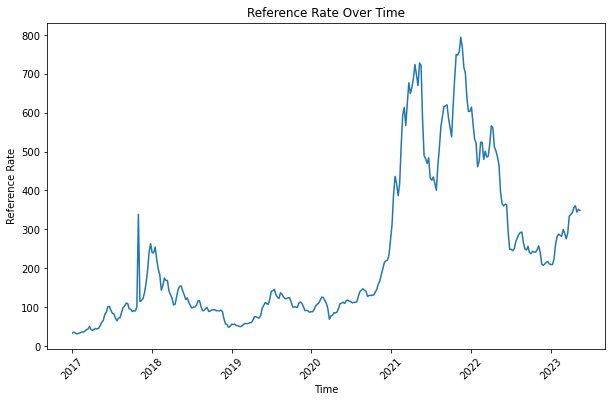

In [27]:
# Creating df in order to only look for the ReferenceRate
df_vis = df_aggregated[["ReferenceRate"]].copy()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(df_vis.index, df_vis)

# Set the x-axis label
ax.set_xlabel("Time")

# Set the y-axis label
ax.set_ylabel("Reference Rate")

# Set the title of the graph
ax.set_title("Reference Rate Over Time")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [28]:
import yfinance as yf

# Retrieve data from Yahoo Finance
symbols = ['^GSPC', '^IXIC', '^DJI', 'GC=F', 'SI=F', 'CL=F']  # Example symbols for S&P 500, NASDAQ, Dow Jones, gold, silver, crude oil
yahoo_data = yf.download(symbols, start='2016-12-30', end='2023-05-15')
yahoo_data = yahoo_data['Close']  # Keep only the 'Close' prices

# Reorder columns based on the symbols list
yahoo_data = yahoo_data.reindex(columns=symbols)

# Rename the columns
column_names = ['SP500', 'NASDAQ', 'DowJones', 'Gold', 'Silver', 'CrudeOil']
yahoo_data.columns = column_names

yahoo_data.head()

[*********************100%***********************]  6 of 6 completed


,SP500,NASDAQ,DowJones,Gold,Silver,CrudeOil
Date,,,,,,
2016-12-30,2238.830078,5383.120117,19762.599609,1150.000000,15.936000,53.720001
2017-01-03,2257.830078,5429.080078,19881.759766,1160.400024,16.356001,52.330002
2017-01-04,2270.750000,5477.000000,19942.160156,1163.800049,16.499001,53.259998
2017-01-05,2269.000000,5487.939941,19899.289062,1179.699951,16.584000,53.759998
2017-01-06,2276.979980,5521.060059,19963.800781,1171.900024,16.466000,53.990002


In [29]:
import requests
import json

# Individual api key
api_key = 'd1474a38b8d6b4a08fa29b1643af5b58'

def get_fred_data(series_id, start_date, end_date):
    url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json&observation_start={start_date}&observation_end={end_date}'
    response = requests.get(url)
    try:
        data = json.loads(response.text)['observations']
    except KeyError:
        print(f"Error fetching data for {series_id}. Response: {response.text}")
        return pd.DataFrame()
    
    df_fred = pd.DataFrame(data)
    df_fred['date'] = pd.to_datetime(df_fred['date'])
    df_fred.set_index('date', inplace=True)
    df_fred = df_fred[['value']]
    df_fred = df_fred.resample('W-MON', label='left', closed='left').last()
    df_fred.columns = [series_id]
    df_fred[series_id] = pd.to_numeric(df_fred.iloc[:,0], errors='coerce')
    
    return df_fred

# Define the start and end dates
start_date = '2016-12-30'
end_date = '2023-05-15'

# Fetch macroeconomic data from FRED
gdp_data = get_fred_data('GDP', start_date, end_date)
unemployment_data = get_fred_data('UNRATE', start_date, end_date)
inflation_data = get_fred_data('CPIAUCSL', start_date, end_date)
m2_data = get_fred_data('WM2NS', start_date, end_date)

df_fred_weekly = pd.concat([gdp_data.iloc[:,0],
                     unemployment_data.iloc[:,0],
                     inflation_data.iloc[:, 0],
                     m2_data.iloc[:,0],],axis=1)

df_fred_weekly.columns = ['GDP', 'Unemployment', 'Inflation', 'M2']

# Reindex the DataFrame
date_range = pd.date_range(start=start_date, end=end_date, freq='W-MON')
df_fred_weekly = df_fred_weekly.reindex(date_range)

df_fred_weekly.head()

,GDP,Unemployment,Inflation,M2
2017-01-02,NaN,NaN,NaN,13346.1
2017-01-09,NaN,NaN,NaN,13369.2
2017-01-16,NaN,NaN,NaN,13333.9
2017-01-23,NaN,NaN,NaN,13234.4
2017-01-30,NaN,4.6,244.006,13180.5


In [30]:
# Resample the Yahoo Finance data to weekly frequency
df_yahoo_weekly = yahoo_data.resample('W-MON').last()
df_fred_weekly = df_fred_weekly.resample('W-MON').last()

# Forward fill missing values
df_yahoo_weekly.fillna(method='ffill', inplace=True)
df_fred_weekly.fillna(method='ffill', inplace=True)
df_fred_weekly.fillna(method='bfill', inplace=True)

# Merge the resampled Yahoo Finance data with df_aggregated
df_merged = pd.concat([df_aggregated, df_yahoo_weekly, df_fred_weekly], axis=1)
df_merged.head()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,...,SP500,NASDAQ,DowJones,Gold,Silver,CrudeOil,GDP,Unemployment,Inflation,M2
2017-01-02,2.759253e+06,248441.000000,47491.857143,5.049924e+06,6119.000000,1.518931e+06,4.154845e+06,141332.428571,8.292783e+06,6.065049e+05,...,2238.830078,5383.120117,19762.599609,1150.000000,15.936000,53.720001,19438.643,4.6,244.006,13346.1
2017-01-09,9.889732e+06,871727.857143,166387.428571,1.767255e+07,21509.857143,5.316332e+06,1.454555e+07,494483.857143,2.903374e+07,2.124377e+06,...,2268.899902,5531.819824,19887.380859,1183.500000,16.629999,51.959999,19438.643,4.6,244.006,13369.2
2017-01-16,9.845421e+06,876928.142857,166228.000000,1.767422e+07,21499.857143,5.314798e+06,1.456219e+07,494053.714286,2.906592e+07,2.124969e+06,...,2274.639893,5574.120117,19885.730469,1195.300049,16.719999,52.369999,19438.643,4.6,244.006,13333.9
2017-01-23,9.841003e+06,882297.857143,166445.000000,1.771058e+07,21526.428571,5.318879e+06,1.456741e+07,493311.142857,2.908759e+07,2.122200e+06,...,2265.199951,5552.939941,19799.849609,1215.000000,17.150000,52.750000,19438.643,4.6,244.006,13234.4
2017-01-30,1.004979e+07,886092.142857,166745.857143,1.772873e+07,21664.285714,5.324168e+06,1.453396e+07,493560.142857,2.906041e+07,2.121745e+06,...,2280.899902,5613.709961,19971.130859,1193.199951,17.122000,52.630001,19438.643,4.6,244.006,13180.5


## Santiment Data

### Bitcoin

In [31]:
df_btc = pd.read_csv('/home/lmilo_ext/Data/santiment/btc_all.csv')
df_btc.head()

,Date,Price,Volume,Price Volatility 1w,Price Volatility 2w,Price Volatility 4w,Social Volume,Trending Words Rank,Weighted sentiment (Total),Binance Funding Rate (BUSD),...,NVT Ratio (with Transaction Volume),Circulation NVT,Realized Cap,Realized Cap (7d),Realized Cap (30d),Realized Cap (90d),Realized Cap (60d),Realized Cap (180d),Realized Cap (365d),Stock to Flow ratio
0,2012-04-19T00:00:00.000Z,NaN,NaN,0.018346,0.028921,0.030139,NaN,NaN,NaN,NaN,...,10.751033,30.615695,4.335300e+07,3.711185e+06,7.216561e+06,1.189815e+07,9.733705e+06,1.737875e+07,4.258169e+07,3.822971
1,2012-04-22T00:00:00.000Z,NaN,NaN,0.018346,0.028921,0.030139,196.0,NaN,NaN,NaN,...,10.751033,30.615695,4.335300e+07,3.711185e+06,7.216561e+06,1.189815e+07,9.733705e+06,1.737875e+07,4.258169e+07,3.822971
2,2012-04-23T00:00:00.000Z,NaN,NaN,0.018346,0.028921,0.030139,233.0,NaN,NaN,NaN,...,10.751033,30.615695,4.335300e+07,3.711185e+06,7.216561e+06,1.189815e+07,9.733705e+06,1.737875e+07,4.258169e+07,3.822971
3,2012-04-24T00:00:00.000Z,NaN,NaN,0.018346,0.028921,0.030139,270.0,NaN,NaN,NaN,...,10.751033,30.615695,4.335300e+07,3.711185e+06,7.216561e+06,1.189815e+07,9.733705e+06,1.737875e+07,4.258169e+07,3.822971
4,2012-04-25T00:00:00.000Z,NaN,NaN,0.018346,0.028921,0.030139,239.0,NaN,NaN,NaN,...,10.751033,30.615695,4.335300e+07,3.711185e+06,7.216561e+06,1.189815e+07,9.733705e+06,1.737875e+07,4.258169e+07,3.822971


In [32]:
# Filter the dataframe to include only the rows where the year is greater than or equal to 2017:
df_btc['Date'] = pd.to_datetime(df_btc['Date'])
df_btcnew = df_btc[df_btc['Date'].dt.year >= 2017]
df_btcnew.head()

,Date,Price,Volume,Price Volatility 1w,Price Volatility 2w,Price Volatility 4w,Social Volume,Trending Words Rank,Weighted sentiment (Total),Binance Funding Rate (BUSD),...,NVT Ratio (with Transaction Volume),Circulation NVT,Realized Cap,Realized Cap (7d),Realized Cap (30d),Realized Cap (90d),Realized Cap (60d),Realized Cap (180d),Realized Cap (365d),Stock to Flow ratio
1716,2017-01-01 00:00:00+00:00,1154.730,344946000.0,0.032550,0.069945,0.089966,1802.0,NaN,-0.635616,NaN,...,12.922248,49.788211,6.778639e+09,8.053418e+08,1.518250e+09,2.405146e+09,2.053070e+09,3.152297e+09,4.155398e+09,23.040123
1717,2017-01-02 00:00:00+00:00,1154.730,344946000.0,0.032550,0.069945,0.089966,2606.0,NaN,1.027972,NaN,...,12.922248,49.788211,6.778639e+09,8.053418e+08,1.518250e+09,2.405146e+09,2.053070e+09,3.152297e+09,4.155398e+09,23.040123
1718,2017-01-03 00:00:00+00:00,1154.730,344946000.0,0.032550,0.069945,0.089966,2580.0,NaN,1.271748,NaN,...,12.922248,49.788211,6.778639e+09,8.053418e+08,1.518250e+09,2.405146e+09,2.053070e+09,3.152297e+09,4.155398e+09,23.040123
1719,2017-01-04 00:00:00+00:00,1154.730,344946000.0,0.032550,0.069945,0.089966,3313.0,NaN,3.953967,NaN,...,12.922248,49.788211,6.778639e+09,8.053418e+08,1.518250e+09,2.405146e+09,2.053070e+09,3.152297e+09,4.155398e+09,23.040123
1720,2017-01-05 00:00:00+00:00,777.757,310929000.0,0.080164,0.070964,0.108932,3277.0,NaN,0.335657,NaN,...,10.429545,46.689102,6.955983e+09,9.405468e+08,1.760465e+09,2.645598e+09,2.266801e+09,3.340732e+09,4.345490e+09,23.059014


In [33]:
df_btcnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 1716 to 4007
Data columns (total 72 columns):
 #   Column                                                            Non-Null Count  Dtype              
---  ------                                                            --------------  -----              
 0   Date                                                              2292 non-null   datetime64[ns, UTC]
 1   Price                                                             2292 non-null   float64            
 2   Volume                                                            2292 non-null   float64            
 3   Price Volatility 1w                                               2292 non-null   float64            
 4   Price Volatility 2w                                               2292 non-null   float64            
 5   Price Volatility 4w                                               2292 non-null   float64            
 6   Social Volume                

In [34]:
df_btcclean = df_btcnew.copy()

# Setting the threshold count
threshold = 0.1 * len(df_btcclean)

# Dropping all columns that contain less then 10% not-null values
df_btcclean = df_btcclean.dropna(axis=1, thresh=threshold)

# Filling rest of columns ans drop remaining nulls
df_btcclean.fillna(method='ffill', inplace=True)
df_btcclean = df_btcclean.dropna(axis=1)
df_btcclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2292 entries, 1716 to 4007
Data columns (total 64 columns):
 #   Column                                                            Non-Null Count  Dtype              
---  ------                                                            --------------  -----              
 0   Date                                                              2292 non-null   datetime64[ns, UTC]
 1   Price                                                             2292 non-null   float64            
 2   Volume                                                            2292 non-null   float64            
 3   Price Volatility 1w                                               2292 non-null   float64            
 4   Price Volatility 2w                                               2292 non-null   float64            
 5   Price Volatility 4w                                               2292 non-null   float64            
 6   Social Volume                

In [35]:
df_btcclean.head()

,Date,Price,Volume,Price Volatility 1w,Price Volatility 2w,Price Volatility 4w,Social Volume,Weighted sentiment (Total),Exchange Flow Balance,Supply on Exchanges,...,NVT Ratio (with Transaction Volume),Circulation NVT,Realized Cap,Realized Cap (7d),Realized Cap (30d),Realized Cap (90d),Realized Cap (60d),Realized Cap (180d),Realized Cap (365d),Stock to Flow ratio
1716,2017-01-01 00:00:00+00:00,1154.730,344946000.0,0.032550,0.069945,0.089966,1802.0,-0.635616,55700.927924,419097.027096,...,12.922248,49.788211,6.778639e+09,8.053418e+08,1.518250e+09,2.405146e+09,2.053070e+09,3.152297e+09,4.155398e+09,23.040123
1717,2017-01-02 00:00:00+00:00,1154.730,344946000.0,0.032550,0.069945,0.089966,2606.0,1.027972,55700.927924,419097.027096,...,12.922248,49.788211,6.778639e+09,8.053418e+08,1.518250e+09,2.405146e+09,2.053070e+09,3.152297e+09,4.155398e+09,23.040123
1718,2017-01-03 00:00:00+00:00,1154.730,344946000.0,0.032550,0.069945,0.089966,2580.0,1.271748,55700.927924,419097.027096,...,12.922248,49.788211,6.778639e+09,8.053418e+08,1.518250e+09,2.405146e+09,2.053070e+09,3.152297e+09,4.155398e+09,23.040123
1719,2017-01-04 00:00:00+00:00,1154.730,344946000.0,0.032550,0.069945,0.089966,3313.0,3.953967,55700.927924,419097.027096,...,12.922248,49.788211,6.778639e+09,8.053418e+08,1.518250e+09,2.405146e+09,2.053070e+09,3.152297e+09,4.155398e+09,23.040123
1720,2017-01-05 00:00:00+00:00,777.757,310929000.0,0.080164,0.070964,0.108932,3277.0,0.335657,-3602.961875,460112.566411,...,10.429545,46.689102,6.955983e+09,9.405468e+08,1.760465e+09,2.645598e+09,2.266801e+09,3.340732e+09,4.345490e+09,23.059014


In [36]:
df_btcweekly = df_btcclean.copy()
df_btcweekly['Date'] = pd.to_datetime(df_btcweekly['Date'])

# Set 'time' column as the index
df_btcweekly.set_index('Date', inplace=True)

# Perform rolling window analysis with desired window size and aggregation method
window_size = 7  # 7 days for a weekly window
rolled_data = df_btcweekly.rolling(window_size).mean()

# Create a new DataFrame with 'time', and rolled data
df_btcrolled = pd.DataFrame({
    'index': range(len(df_btcweekly)),  # Use numbered index
    'date': df_btcweekly.index,
    **rolled_data
})
# Set the numbered index as the DataFrame index
df_btcrolled.set_index('index', inplace=True)

In [37]:
# Create mean weekly data and setting time as index
df_btcfinal = df_btcrolled.copy()
df_btcfinal.dropna(inplace=True)
df_btcfinal.reset_index(drop=True, inplace=True)
df_btcfinal.set_index('date', inplace=True)
df_btcfinal = df_btcfinal.resample('W-MON').mean()
df_btcfinal.head()

,Price,Volume,Price Volatility 1w,Price Volatility 2w,Price Volatility 4w,Social Volume,Weighted sentiment (Total),Exchange Flow Balance,Supply on Exchanges,Supply outside of Exchanges,...,NVT Ratio (with Transaction Volume),Circulation NVT,Realized Cap,Realized Cap (7d),Realized Cap (30d),Realized Cap (90d),Realized Cap (60d),Realized Cap (180d),Realized Cap (365d),Stock to Flow ratio
date,,,,,,,,,,,,,,,,,,,,,
2017-01-09 00:00:00+00:00,939.316857,3.255077e+08,0.059758,0.070527,0.100804,2748.666667,0.742662,21812.990896,442534.478134,1.564266e+07,...,11.497847,48.017291,6.879978e+09,8.826018e+08,1.656658e+09,2.542547e+09,2.175202e+09,3.259974e+09,4.264022e+09,23.050918
2017-01-16 00:00:00+00:00,818.775122,2.855257e+08,0.072669,0.081125,0.104174,2507.326531,0.034022,-1620.909179,455468.795985,1.563944e+07,...,11.135487,52.253038,6.952027e+09,8.584415e+08,1.747843e+09,2.640501e+09,2.259350e+09,3.337645e+09,4.339008e+09,23.206170
2017-01-23 00:00:00+00:00,888.964918,1.953211e+08,0.051288,0.089266,0.092318,2353.897959,0.247473,-480.702118,447867.572927,1.566117e+07,...,13.263055,62.507007,6.977276e+09,6.752914e+08,1.736224e+09,2.654568e+09,2.270288e+09,3.359355e+09,4.354986e+09,23.586007
2017-01-30 00:00:00+00:00,928.017327,1.319337e+08,0.027082,0.050901,0.084964,2462.714286,0.168367,-4563.277071,446684.098731,1.567669e+07,...,15.584666,59.141003,7.051892e+09,6.443858e+08,1.723002e+09,2.694323e+09,2.305593e+09,3.404450e+09,4.415296e+09,22.095225
2017-02-06 00:00:00+00:00,1009.905122,1.653528e+08,0.019745,0.037036,0.078155,2457.163265,-0.731628,-20961.017526,436274.422015,1.570082e+07,...,15.785938,60.998339,7.150612e+09,6.733023e+08,1.673595e+09,2.772407e+09,2.353981e+09,3.454941e+09,4.504209e+09,20.314899


In [38]:
# Now all column names will have "_btc" as a suffix
df_btcfinal.columns = [col + '_btc' for col in df_btcfinal.columns]
df_btcfinal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 328 entries, 2017-01-09 00:00:00+00:00 to 2023-04-17 00:00:00+00:00
Freq: W-MON
Data columns (total 63 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Price_btc                                                             328 non-null    float64
 1   Volume_btc                                                            328 non-null    float64
 2   Price Volatility 1w_btc                                               328 non-null    float64
 3   Price Volatility 2w_btc                                               328 non-null    float64
 4   Price Volatility 4w_btc                                               328 non-null    float64
 5   Social Volume_btc                                                     328 non-null    float64
 6   Weighted sentiment (Total)_btc       

### Ethereum

In [39]:
df_eth = pd.read_csv('/home/lmilo_ext/Data/santiment/eth_all.csv')
df_eth.head()

,Date,Price,Volume,Price Volatility 1w,Price Volatility 2w,Price Volatility 4w,Social Volume,Trending Words Rank,Weighted sentiment (Total),Binance Funding Rate (BUSD),...,NVT Ratio (with Transaction Volume),Circulation NVT,Realized Cap,Realized Cap (7d),Realized Cap (30d),Realized Cap (90d),Realized Cap (60d),Realized Cap (180d),Realized Cap (365d),Stock to Flow ratio
0,2016-09-22T00:00:00.000Z,13.2748,10239000,0.033503,0.05184,0.0609,609,NaN,0.406716,NaN,...,34.342931,59.526477,6.857262e+08,5.174624e+07,1.217191e+08,5.983816e+08,3.606866e+08,6.521724e+08,6.784495e+08,7.145202
1,2016-09-23T00:00:00.000Z,13.2748,10239000,0.033503,0.05184,0.0609,500,NaN,0.372524,NaN,...,34.342931,59.526477,6.857262e+08,5.174624e+07,1.217191e+08,5.983816e+08,3.606866e+08,6.521724e+08,6.784495e+08,7.145202
2,2016-09-24T00:00:00.000Z,13.2748,10239000,0.033503,0.05184,0.0609,366,NaN,0.337696,NaN,...,34.342931,59.526477,6.857262e+08,5.174624e+07,1.217191e+08,5.983816e+08,3.606866e+08,6.521724e+08,6.784495e+08,7.145202
3,2016-09-25T00:00:00.000Z,13.2748,10239000,0.033503,0.05184,0.0609,330,NaN,0.264275,NaN,...,34.342931,59.526477,6.857262e+08,5.174624e+07,1.217191e+08,5.983816e+08,3.606866e+08,6.521724e+08,6.784495e+08,7.145202
4,2016-09-26T00:00:00.000Z,13.2748,10239000,0.033503,0.05184,0.0609,432,NaN,0.174125,NaN,...,34.342931,59.526477,6.857262e+08,5.174624e+07,1.217191e+08,5.983816e+08,3.606866e+08,6.521724e+08,6.784495e+08,7.145202


In [40]:
# Filter the dataframe to include only the rows where the year is greater than or equal to 2017:
df_eth['Date'] = pd.to_datetime(df_eth['Date'])
df_ethnew = df_eth[df_eth['Date'].dt.year >= 2017]
df_ethnew.head()

,Date,Price,Volume,Price Volatility 1w,Price Volatility 2w,Price Volatility 4w,Social Volume,Trending Words Rank,Weighted sentiment (Total),Binance Funding Rate (BUSD),...,NVT Ratio (with Transaction Volume),Circulation NVT,Realized Cap,Realized Cap (7d),Realized Cap (30d),Realized Cap (90d),Realized Cap (60d),Realized Cap (180d),Realized Cap (365d),Stock to Flow ratio
101,2017-01-01 00:00:00+00:00,11.25160,41051200,0.058266,0.053615,0.061806,283,NaN,-0.139072,NaN,...,21.511449,61.304472,7.095554e+08,2.716173e+07,6.958500e+07,2.075176e+08,1.235206e+08,6.399582e+08,6.989845e+08,7.481812
102,2017-01-02 00:00:00+00:00,11.25160,41051200,0.058266,0.053615,0.061806,380,NaN,0.050136,NaN,...,21.511449,61.304472,7.095554e+08,2.716173e+07,6.958500e+07,2.075176e+08,1.235206e+08,6.399582e+08,6.989845e+08,7.481812
103,2017-01-03 00:00:00+00:00,11.25160,41051200,0.058266,0.053615,0.061806,453,NaN,0.499701,NaN,...,21.511449,61.304472,7.095554e+08,2.716173e+07,6.958500e+07,2.075176e+08,1.235206e+08,6.399582e+08,6.989845e+08,7.481812
104,2017-01-04 00:00:00+00:00,11.25160,41051200,0.058266,0.053615,0.061806,575,NaN,1.481547,NaN,...,21.511449,61.304472,7.095554e+08,2.716173e+07,6.958500e+07,2.075176e+08,1.235206e+08,6.399582e+08,6.989845e+08,7.481812
105,2017-01-05 00:00:00+00:00,9.71776,26823500,0.095128,0.140318,0.124389,502,NaN,1.059501,NaN,...,18.162609,121.263519,7.169842e+08,3.770406e+07,7.475178e+07,2.094036e+08,1.346231e+08,6.465141e+08,7.060921e+08,7.637896


In [41]:
df_ethnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2288 entries, 101 to 2388
Data columns (total 72 columns):
 #   Column                                                            Non-Null Count  Dtype              
---  ------                                                            --------------  -----              
 0   Date                                                              2288 non-null   datetime64[ns, UTC]
 1   Price                                                             2288 non-null   float64            
 2   Volume                                                            2288 non-null   int64              
 3   Price Volatility 1w                                               2288 non-null   float64            
 4   Price Volatility 2w                                               2288 non-null   float64            
 5   Price Volatility 4w                                               2288 non-null   float64            
 6   Social Volume                 

In [42]:
df_ethclean = df_ethnew.copy()

# Setting the threshold count
threshold = 0.1 * len(df_ethclean)

# Dropping all columns that contain less then 10% not-null values
df_ethclean = df_ethclean.dropna(axis=1, thresh=threshold)

# Filling rest of columns ans drop remaining nulls
df_ethclean.fillna(method='ffill', inplace=True)
df_ethclean = df_ethclean.dropna(axis=1)
df_ethclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2288 entries, 101 to 2388
Data columns (total 67 columns):
 #   Column                                                            Non-Null Count  Dtype              
---  ------                                                            --------------  -----              
 0   Date                                                              2288 non-null   datetime64[ns, UTC]
 1   Price                                                             2288 non-null   float64            
 2   Volume                                                            2288 non-null   int64              
 3   Price Volatility 1w                                               2288 non-null   float64            
 4   Price Volatility 2w                                               2288 non-null   float64            
 5   Price Volatility 4w                                               2288 non-null   float64            
 6   Social Volume                 

In [43]:
df_ethclean.head()

,Date,Price,Volume,Price Volatility 1w,Price Volatility 2w,Price Volatility 4w,Social Volume,Weighted sentiment (Total),Exchange Flow Balance,Supply on Exchanges,...,NVT Ratio (with Transaction Volume),Circulation NVT,Realized Cap,Realized Cap (7d),Realized Cap (30d),Realized Cap (90d),Realized Cap (60d),Realized Cap (180d),Realized Cap (365d),Stock to Flow ratio
101,2017-01-01 00:00:00+00:00,11.25160,41051200,0.058266,0.053615,0.061806,283,-0.139072,-189987.413902,2.217355e+07,...,21.511449,61.304472,7.095554e+08,2.716173e+07,6.958500e+07,2.075176e+08,1.235206e+08,6.399582e+08,6.989845e+08,7.481812
102,2017-01-02 00:00:00+00:00,11.25160,41051200,0.058266,0.053615,0.061806,380,0.050136,-189987.413902,2.217355e+07,...,21.511449,61.304472,7.095554e+08,2.716173e+07,6.958500e+07,2.075176e+08,1.235206e+08,6.399582e+08,6.989845e+08,7.481812
103,2017-01-03 00:00:00+00:00,11.25160,41051200,0.058266,0.053615,0.061806,453,0.499701,-189987.413902,2.217355e+07,...,21.511449,61.304472,7.095554e+08,2.716173e+07,6.958500e+07,2.075176e+08,1.235206e+08,6.399582e+08,6.989845e+08,7.481812
104,2017-01-04 00:00:00+00:00,11.25160,41051200,0.058266,0.053615,0.061806,575,1.481547,-189987.413902,2.217355e+07,...,21.511449,61.304472,7.095554e+08,2.716173e+07,6.958500e+07,2.075176e+08,1.235206e+08,6.399582e+08,6.989845e+08,7.481812
105,2017-01-05 00:00:00+00:00,9.71776,26823500,0.095128,0.140318,0.124389,502,1.059501,-461978.491063,2.186074e+07,...,18.162609,121.263519,7.169842e+08,3.770406e+07,7.475178e+07,2.094036e+08,1.346231e+08,6.465141e+08,7.060921e+08,7.637896


In [44]:
df_ethweekly = df_ethclean.copy()
df_ethweekly['Date'] = pd.to_datetime(df_ethweekly['Date'])

# Set 'time' column as the index
df_ethweekly.set_index('Date', inplace=True)

# Perform rolling window analysis with desired window size and aggregation method
window_size = 7  # 7 days for a weekly window
rolled_data = df_ethweekly.rolling(window_size).mean()

# Create a new DataFrame with 'time', and rolled data
df_ethrolled = pd.DataFrame({
    'index': range(len(df_ethweekly)),  # Use numbered index
    'date': df_ethweekly.index,
    **rolled_data
})
# Set the numbered index as the DataFrame index
df_ethrolled.set_index('index', inplace=True)

In [45]:
# Create mean weekly data and setting time as index
df_ethfinal = df_ethrolled.copy()
df_ethfinal.dropna(inplace=True)
df_ethfinal.reset_index(drop=True, inplace=True)
df_ethfinal.set_index('date', inplace=True)
df_ethfinal = df_ethfinal.resample('W-MON').mean()
df_ethfinal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 327 entries, 2017-01-09 00:00:00+00:00 to 2023-04-10 00:00:00+00:00
Freq: W-MON
Data columns (total 66 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Price                                                             327 non-null    float64
 1   Volume                                                            327 non-null    float64
 2   Price Volatility 1w                                               327 non-null    float64
 3   Price Volatility 2w                                               327 non-null    float64
 4   Price Volatility 4w                                               327 non-null    float64
 5   Social Volume                                                     327 non-null    float64
 6   Weighted sentiment (Total)                                        327

In [46]:
# Now all column names will have "_eth" as a suffix
df_ethfinal.columns = [col + '_eth' for col in df_ethfinal.columns]
df_ethfinal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 327 entries, 2017-01-09 00:00:00+00:00 to 2023-04-10 00:00:00+00:00
Freq: W-MON
Data columns (total 66 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Price_eth                                                             327 non-null    float64
 1   Volume_eth                                                            327 non-null    float64
 2   Price Volatility 1w_eth                                               327 non-null    float64
 3   Price Volatility 2w_eth                                               327 non-null    float64
 4   Price Volatility 4w_eth                                               327 non-null    float64
 5   Social Volume_eth                                                     327 non-null    float64
 6   Weighted sentiment (Total)_eth       

### Merge Ethereum & Bitcoin Santiment with full dataset

In [47]:
df_santiment = df_ethfinal.join(df_btcfinal, how='left')
df_santiment.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 327 entries, 2017-01-09 00:00:00+00:00 to 2023-04-10 00:00:00+00:00
Freq: W-MON
Columns: 129 entries, Price_eth to Stock to Flow ratio_btc
dtypes: float64(129)
memory usage: 340.2 KB


In [48]:
df_santiment.head()

,Price_eth,Volume_eth,Price Volatility 1w_eth,Price Volatility 2w_eth,Price Volatility 4w_eth,Social Volume_eth,Weighted sentiment (Total)_eth,Exchange Flow Balance_eth,Supply on Exchanges_eth,Supply outside of Exchanges_eth,...,NVT Ratio (with Transaction Volume)_btc,Circulation NVT_btc,Realized Cap_btc,Realized Cap (7d)_btc,Realized Cap (30d)_btc,Realized Cap (90d)_btc,Realized Cap (60d)_btc,Realized Cap (180d)_btc,Realized Cap (365d)_btc,Stock to Flow ratio_btc
date,,,,,,,,,,,,,,,,,,,,,
2017-01-09 00:00:00+00:00,10.375120,3.292109e+07,0.079330,0.103160,0.097568,417.619048,0.450549,-345410.886566,2.199480e+07,6.569618e+07,...,11.497847,48.017291,6.879978e+09,8.826018e+08,1.656658e+09,2.542547e+09,2.175202e+09,3.259974e+09,4.264022e+09,23.050918
2017-01-16 00:00:00+00:00,9.905198,2.220510e+07,0.076111,0.119708,0.129299,358.000000,0.224675,-284299.022176,2.182341e+07,6.602575e+07,...,11.135487,52.253038,6.952027e+09,8.584415e+08,1.747843e+09,2.640501e+09,2.259350e+09,3.337645e+09,4.339008e+09,23.206170
2017-01-23 00:00:00+00:00,10.322299,9.879711e+06,0.034825,0.068030,0.137831,314.102041,0.253037,-212315.923000,2.153044e+07,6.653975e+07,...,13.263055,62.507007,6.977276e+09,6.752914e+08,1.736224e+09,2.654568e+09,2.270288e+09,3.359355e+09,4.354986e+09,23.586007
2017-01-30 00:00:00+00:00,10.612976,8.701409e+06,0.023452,0.037270,0.106358,327.897959,0.209133,-563696.437815,2.104540e+07,6.724549e+07,...,15.584666,59.141003,7.051892e+09,6.443858e+08,1.723002e+09,2.694323e+09,2.305593e+09,3.404450e+09,4.415296e+09,22.095225
2017-02-06 00:00:00+00:00,10.942812,1.175926e+07,0.014049,0.027843,0.059825,285.326531,0.036837,26721.431413,2.093326e+07,6.757794e+07,...,15.785938,60.998339,7.150612e+09,6.733023e+08,1.673595e+09,2.772407e+09,2.353981e+09,3.454941e+09,4.504209e+09,20.314899


In [49]:
# Concatenate the dataframes
df_merged.index = pd.to_datetime(df_merged.index)
df_santiment.index = pd.to_datetime(df_santiment.index)

df_total = pd.merge_asof(df_merged, df_santiment, left_index=True, right_index=True, direction='backward')
df_total.fillna(method='bfill', inplace=True)
print(df_total.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 333 entries, 2017-01-02 to 2023-05-15
Freq: W-MON
Columns: 190 entries, AdrActCnt to Stock to Flow ratio_btc
dtypes: float64(190)
memory usage: 496.9 KB
None


In [50]:
df_total.head()

,AdrActCnt,AdrBal1in100KCnt,AdrBal1in10KCnt,AdrBal1in10MCnt,AdrBal1in1KCnt,AdrBal1in1MCnt,AdrBalNtv100Cnt,AdrBalNtv100KCnt,AdrBalNtv10Cnt,AdrBalNtv10KCnt,...,NVT Ratio (with Transaction Volume)_btc,Circulation NVT_btc,Realized Cap_btc,Realized Cap (7d)_btc,Realized Cap (30d)_btc,Realized Cap (90d)_btc,Realized Cap (60d)_btc,Realized Cap (180d)_btc,Realized Cap (365d)_btc,Stock to Flow ratio_btc
2017-01-02,2.759253e+06,248441.000000,47491.857143,5.049924e+06,6119.000000,1.518931e+06,4.154845e+06,141332.428571,8.292783e+06,6.065049e+05,...,11.497847,48.017291,6.879978e+09,8.826018e+08,1.656658e+09,2.542547e+09,2.175202e+09,3.259974e+09,4.264022e+09,23.050918
2017-01-09,9.889732e+06,871727.857143,166387.428571,1.767255e+07,21509.857143,5.316332e+06,1.454555e+07,494483.857143,2.903374e+07,2.124377e+06,...,11.497847,48.017291,6.879978e+09,8.826018e+08,1.656658e+09,2.542547e+09,2.175202e+09,3.259974e+09,4.264022e+09,23.050918
2017-01-16,9.845421e+06,876928.142857,166228.000000,1.767422e+07,21499.857143,5.314798e+06,1.456219e+07,494053.714286,2.906592e+07,2.124969e+06,...,11.135487,52.253038,6.952027e+09,8.584415e+08,1.747843e+09,2.640501e+09,2.259350e+09,3.337645e+09,4.339008e+09,23.206170
2017-01-23,9.841003e+06,882297.857143,166445.000000,1.771058e+07,21526.428571,5.318879e+06,1.456741e+07,493311.142857,2.908759e+07,2.122200e+06,...,13.263055,62.507007,6.977276e+09,6.752914e+08,1.736224e+09,2.654568e+09,2.270288e+09,3.359355e+09,4.354986e+09,23.586007
2017-01-30,1.004979e+07,886092.142857,166745.857143,1.772873e+07,21664.285714,5.324168e+06,1.453396e+07,493560.142857,2.906041e+07,2.121745e+06,...,15.584666,59.141003,7.051892e+09,6.443858e+08,1.723002e+09,2.694323e+09,2.305593e+09,3.404450e+09,4.415296e+09,22.095225


In [51]:
# Here the output folder has to be set accordingly
output_folder = '/home/lmilo_ext/Data/'
output_filename = 'prepared_data.csv'

# Combine the folder path and filename
output_path = output_folder + output_filename
df_total['date'] = df_total.index
df_total.to_csv(output_path, index=False)